## Observations and Insights 

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_resultsdata = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table=pd.merge(mouse_metadata, study_resultsdata)

# Display the data table for preview
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [150]:
# Checking the number of mice.
mouse_count = merge_table["Mouse ID"].count()
mouse_count

1893

In [151]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=merge_table[merge_table.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [152]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate=merge_table[merge_table.duplicated(['Mouse ID',])]
all_duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [153]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_table.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [154]:
# Checking the number of mice in the clean DataFrame.
count_mouseid = dups_of_df['Mouse ID']
count_mouseid = count_mouseid.count()
count_mouseid_tp = mouse_dup_idtp['Mouse ID']
count_mouseid_tp = count_mouseid_tp.count()

print('Number of mice in dataframe with removed duplicates of Mouse ID and Timepoint:', count_mouseid_tp)
print('Number of mice in dataframe with removed duplicates of Mouse ID:', count_mouseid)


Number of mice in dataframe with removed duplicates of Mouse ID and Timepoint: 1888
Number of mice in dataframe with removed duplicates of Mouse ID: 249


## Summary Statistics

In [155]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance= merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation= merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Summary_table=pd.DataFrame({'mean': mean, 'median': median, 'variance':variance, 'stadard_devation':standard_deviation, 'sem':sem})
Summary_table

,mean,median,variance,stadard_devation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

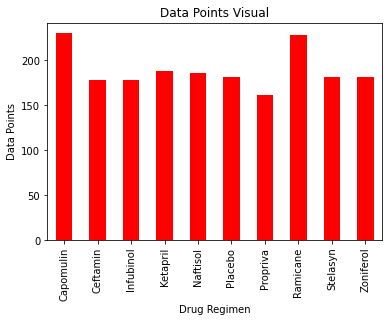

In [156]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Summary_table = merge_table.groupby(["Drug Regimen"]).count()["Mouse ID"]
Summary_table.plot(kind="bar", facecolor="red")

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()

Text(0, 0.5, 'Count')

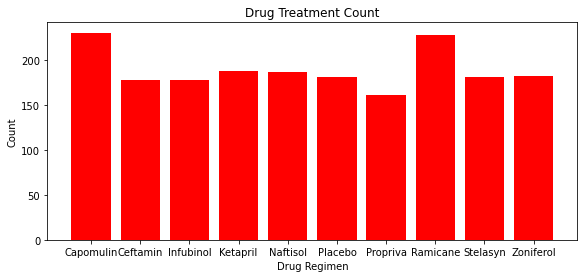

In [157]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_list = Summary_table.index.tolist()

#Turn drug_count into a list
drug_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = np.arange(len(drug_count))
#Assign x-axis
x_axis = drug_list
#Creating and customizing bar chart
plt.figure(figsize=(9.5,4))
plt.bar(x_axis, drug_count, facecolor="red")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

Text(0.5, 1.0, 'Male & Female Mice Percentage')

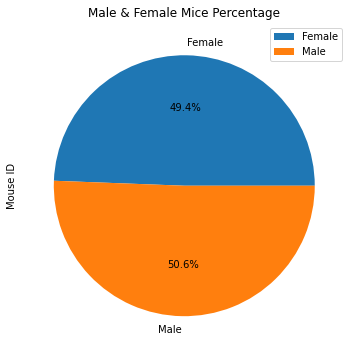

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()

#Alter the dataframe down to two columns
gender_df = gender_df[["Sex","Mouse ID"]]

plt.figure(figsize=(10,6))
ax1 = plt.subplot(aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID",ax=ax1, autopct='%1.1f%%',labels=gender_df["Sex"])

plt.title("Male & Female Mice Percentage")

(-1.1045613723658971,
 1.1002172082078998,
 -1.1027130801595115,
 1.105172849624489)

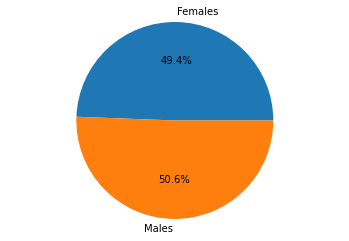

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()

#Adding details to the pie chart
labels = ["Females", "Males"]
plt.pie(gender_count, labels=labels, autopct="%1.1f%%")
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin",:]
ram_df = merge_table.loc[merge_table["Drug Regimen"] == "Ramicane", :]
inf_df = merge_table.loc[merge_table["Drug Regimen"] == "Infubinol", :]
ceft_df = merge_table.loc[merge_table["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

# Start by getting the last (greatest) timepoint for each mouse

caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
caplastmerge = pd.merge(caplastvol, merge_table, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [161]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

print("***Capomulin tumors***")
Capomulin_tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()
#***********************************************************************************************

# Ramicane
Ramicane_last = ram_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, merge_table, on=("Mouse ID","Timepoint"))

print("***Ramicane tumors***")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

#***********************************************************************************************

# Infubinol
Infubinol_last = inf_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, merge_table, on=("Mouse ID","Timepoint"))

print("***Infubinol tumors***")
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

#***********************************************************************************************

# Ceftamin
Ceftamin_last = ceft_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, merge_table, on=("Mouse ID","Timepoint"))

print("***Ceftamin tumors***")
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

***Capomulin tumors***
The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

***Ramicane tumors***
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

***Infubinol tumors***
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could

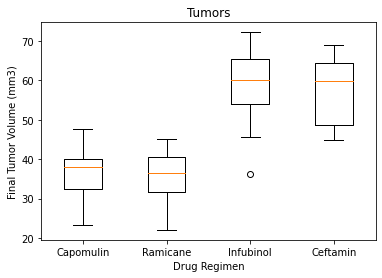

In [162]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

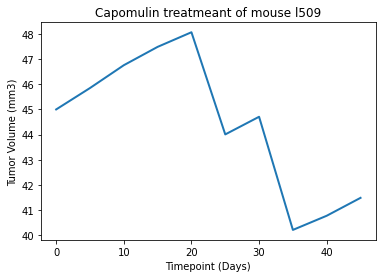

In [163]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()


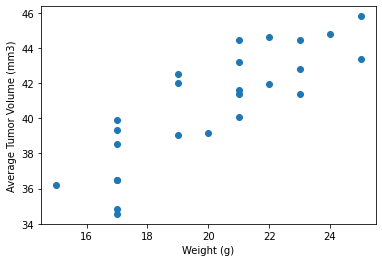

In [164]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
 # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [165]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [166]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712645e-07, stderr=0.12754359033201337, intercept_stderr=2.5909876867683486)

In [167]:
#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

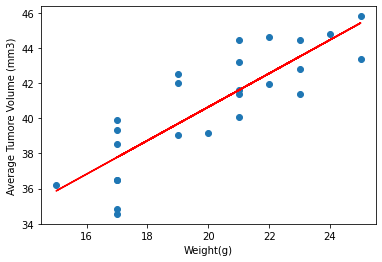

In [168]:
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()

In [ ]:
#Reference code used from.
#https://github.com/Radhika303/The_Power_of_Plots/blob/main/The%20Power%20of%20Plots.ipynb
#https://github.com/dmilestone/matplotlib-challenge-cancer-drug-analysis/blob/master/Pymaceuticals_Final.ipynb